In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.data.path.append("C:/nltk_data")
nltk.download('averaged_perceptron_tagger', download_dir="C:/nltk_data")
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df = pd.read_csv('amazon.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(4915, 12)
(500, 12)


In [3]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


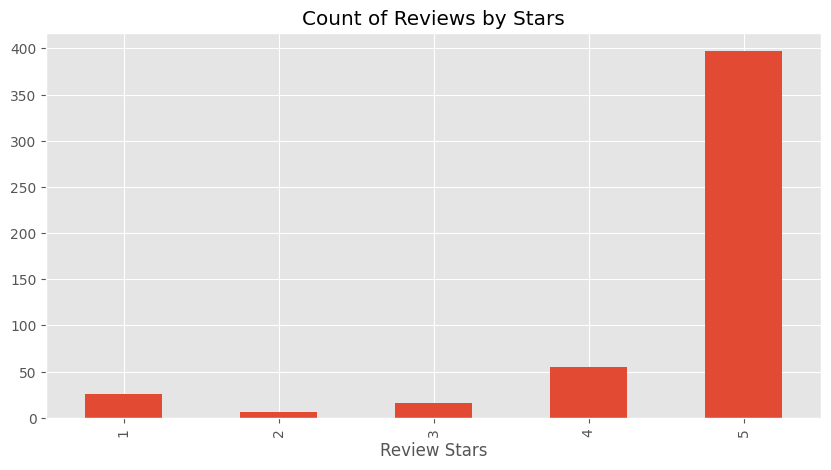

In [4]:
ax = df['overall'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [5]:
example = df['reviewText'][50]
print(example)

A memory card either works or it doesn't. This was always going to be a one star or five star review - no middle ground.The adapter is a nice bonus too, though I don't think I have anything to use it with.


In [6]:
from nltk.tokenize import TreebankWordTokenizer

word_tokenizer = TreebankWordTokenizer()
word_tokens = word_tokenizer.tokenize(example)
print(word_tokens[:10])

['A', 'memory', 'card', 'either', 'works', 'or', 'it', "doesn't.", 'This', 'was']


In [7]:
import nltk

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')  # Also helpful for word_tokenize
tagged = nltk.pos_tag(word_tokens)
print(tagged[:10]) 



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('A', 'DT'), ('memory', 'NN'), ('card', 'NN'), ('either', 'CC'), ('works', 'VBZ'), ('or', 'CC'), ('it', 'PRP'), ("doesn't.", 'VBZ'), ('This', 'DT'), ('was', 'VBD')]


In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

sia = SentimentIntensityAnalyzer()

In [9]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [10]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [11]:
sia.polarity_scores(example)

{'neg': 0.053, 'neu': 0.795, 'pos': 0.152, 'compound': 0.6249}

In [12]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = str(row['reviewText'])
    res[i] = sia.polarity_scores(text)

100%|██████████| 500/500 [00:00<00:00, 822.32it/s]


In [13]:
vaders = pd.DataFrame(res).T
vaders = vaders.merge(df, left_index=True, right_index=True)

In [14]:
vaders.head()

,neg,neu,pos,compound,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0.688,0.312,0.000,-0.2960,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,0.075,0.925,0.000,-0.2960,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,0.077,0.923,0.000,-0.3089,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,0.000,0.909,0.091,0.7081,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,0.038,0.835,0.127,0.7087,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


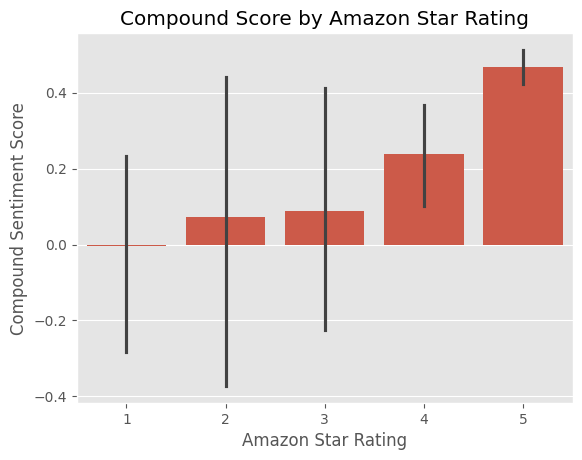

In [15]:
ax = sns.barplot(data=vaders, x='overall', y='compound')
ax.set_title('Compound Score by Amazon Star Rating')
plt.xlabel('Amazon Star Rating')
plt.ylabel('Compound Sentiment Score')
plt.show()


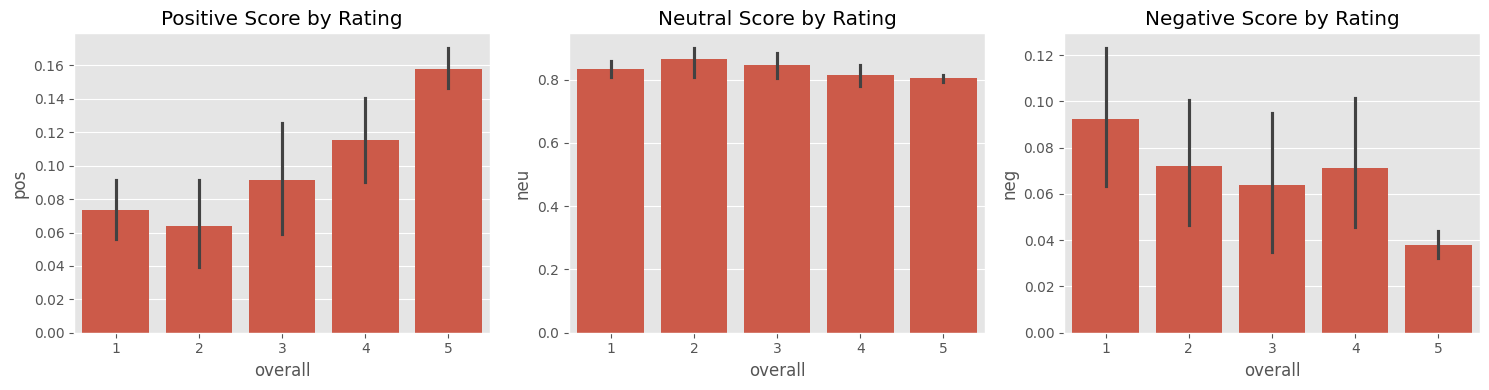

In [79]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

sns.barplot(data=vaders, x='overall', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='overall', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='overall', y='neg', ax=axs[2])

axs[0].set_title('Positive Score by Rating')
axs[1].set_title('Neutral Score by Rating')
axs[2].set_title('Negative Score by Rating')

plt.tight_layout()
plt.show()

In [16]:
!pip install torch 


In [17]:
!pip install transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification

c:\Users\priya\anaconda3\envs\test_c\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
!pip install scipy 



In [19]:
import scipy 
from scipy.special import softmax

In [20]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [21]:
# VADER results on example
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download lexicon once (if not already done)
nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

example = df['reviewText'][50]
print(example)
sia.polarity_scores(example)

A memory card either works or it doesn't. This was always going to be a one star or five star review - no middle ground.The adapter is a nice bonus too, though I don't think I have anything to use it with.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.053, 'neu': 0.795, 'pos': 0.152, 'compound': 0.6249}

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

sia = SentimentIntensityAnalyzer()

In [23]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [24]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [25]:
sia.polarity_scores(example)

{'neg': 0.053, 'neu': 0.795, 'pos': 0.152, 'compound': 0.6249}

In [26]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = str(row['reviewText'])
    res[i] = sia.polarity_scores(text)
    

100%|██████████| 500/500 [00:00<00:00, 866.26it/s]


In [27]:
vaders = pd.DataFrame(res).T
vaders = vaders.merge(df, left_index=True, right_index=True)

In [28]:
vaders.head()

,neg,neu,pos,compound,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0.688,0.312,0.000,-0.2960,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,0.075,0.925,0.000,-0.2960,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,0.077,0.923,0.000,-0.3089,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,0.000,0.909,0.091,0.7081,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,0.038,0.835,0.127,0.7087,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


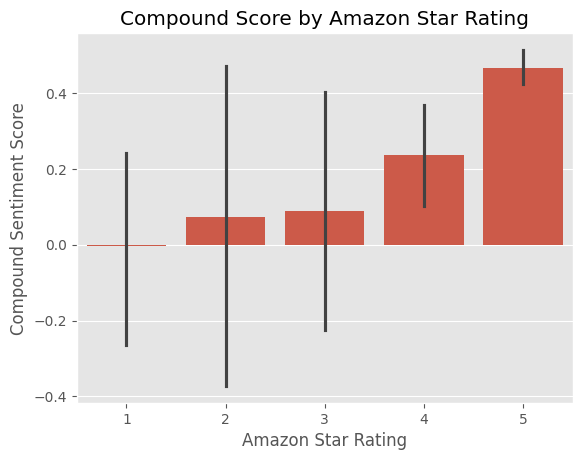

In [29]:
ax = sns.barplot(data=vaders, x='overall', y='compound')
ax.set_title('Compound Score by Amazon Star Rating')
plt.xlabel('Amazon Star Rating')
plt.ylabel('Compound Sentiment Score')
plt.show()


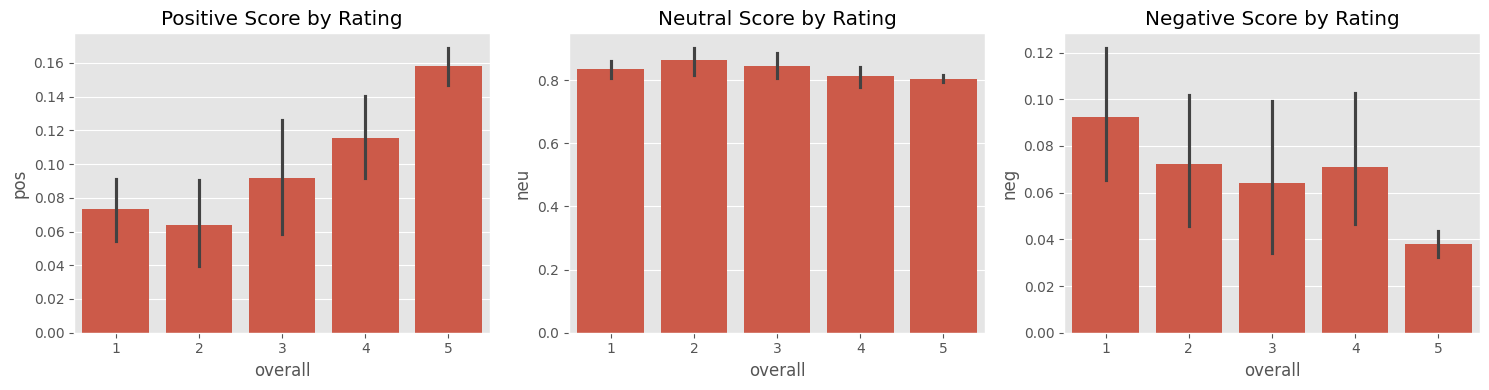

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

sns.barplot(data=vaders, x='overall', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='overall', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='overall', y='neg', ax=axs[2])

axs[0].set_title('Positive Score by Rating')
axs[1].set_title('Neutral Score by Rating')
axs[2].set_title('Negative Score by Rating')

plt.tight_layout()
plt.show()

In [31]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [32]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [33]:
# VADER results on example
example = df['reviewText'][50]
print(example)
sia.polarity_scores(example)

A memory card either works or it doesn't. This was always going to be a one star or five star review - no middle ground.The adapter is a nice bonus too, though I don't think I have anything to use it with.


{'neg': 0.053, 'neu': 0.795, 'pos': 0.152, 'compound': 0.6249}

In [34]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': np.float32(0.15133704), 'roberta_neu': np.float32(0.40594336), 'roberta_pos': np.float32(0.4427196)}


In [35]:
'''def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict'''
def polarity_scores_roberta(example):
    encoded_text = tokenizer(
        example,
        return_tensors='pt',
        truncation=True,
        max_length=512
    )
    output = model(**encoded_text)
    scores = softmax(output.logits[0].detach().numpy())
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict


In [36]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = str(row['reviewText'])  # fixed column name
        myid = i  # using row index as ID

        # VADER
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {f"vader_{k}": v for k, v in vader_result.items()}

        # RoBERTa
        roberta_result = polarity_scores_roberta(text)

        # Merge both
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both

    except RuntimeError:
        print(f'⚠️ Skipped long or problematic review at index {i}')

100%|██████████| 500/500 [00:59<00:00,  8.36it/s]


In [37]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = str(row['reviewText'])  # fixed column name
        myid = i  # using row index as ID

        # VADER
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {f"vader_{k}": v for k, v in vader_result.items()}

        # RoBERTa
        roberta_result = polarity_scores_roberta(text)

        # Merge both
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both

    except RuntimeError:
        print(f'⚠️ Skipped long or problematic review at index {i}')

100%|██████████| 500/500 [00:59<00:00,  8.44it/s]


In [39]:
results_df = pd.DataFrame(res).T

# Combine with df using the index
final_df = pd.concat([df, results_df], axis=1)

In [40]:
results_df.columns

Index(['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg',
       'roberta_neu', 'roberta_pos'],
      dtype='object')

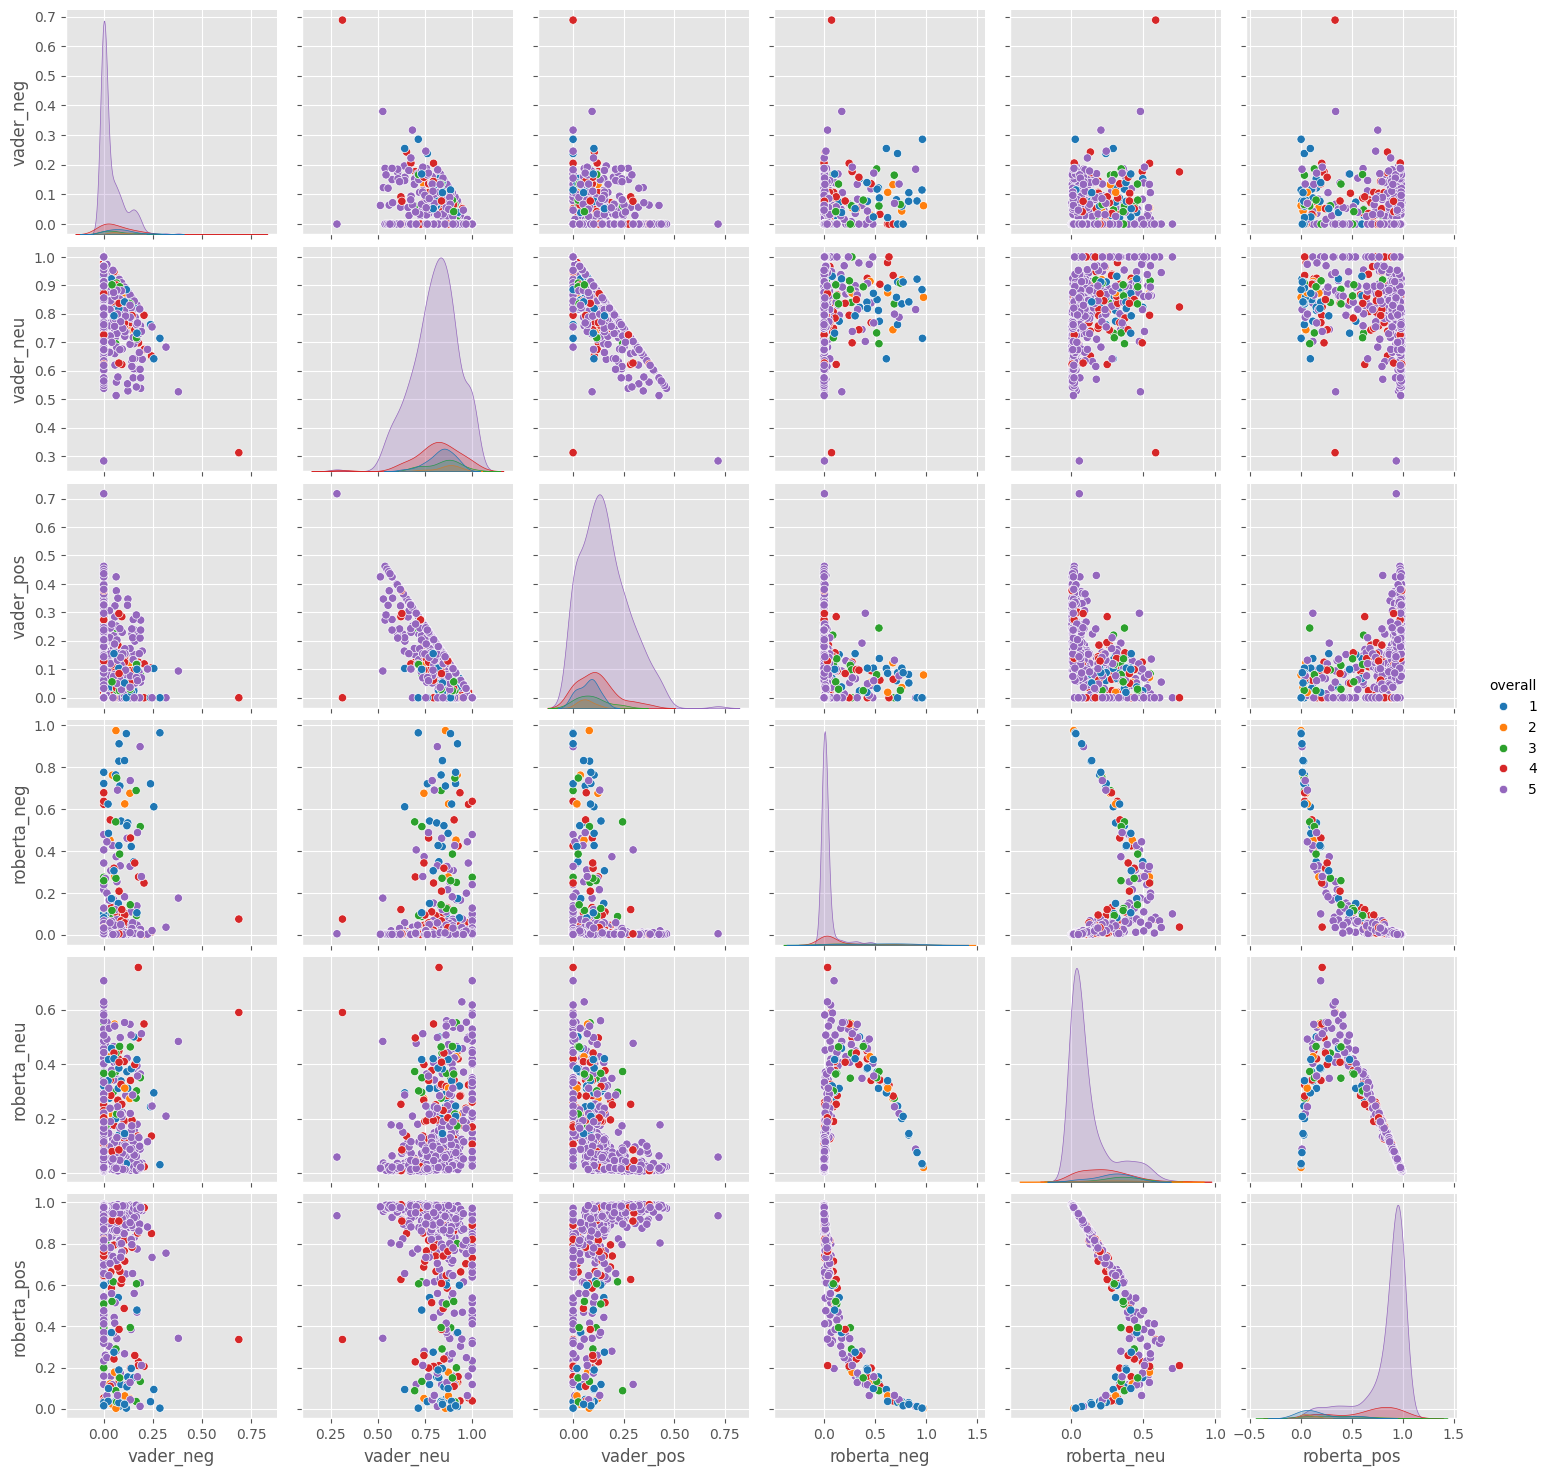

In [41]:
sns.pairplot(
    data=final_df,
    vars=['vader_neg', 'vader_neu', 'vader_pos',
          'roberta_neg', 'roberta_neu', 'roberta_pos'],
    hue='overall',  # make sure this column exists!
    palette='tab10'
)

plt.show()

In [42]:
# Merge the reviewText column from df into final_df
final_df['reviewText'] = df['reviewText']

In [43]:
# Now extract the most positive review where overall == 1
top_review = final_df.query('overall == 1') \
                     .sort_values('roberta_pos', ascending=False) \
                     [['reviewText']].values[0][0]

print("Most Positive Review (overall == 1):\n")
print(top_review)


Most Positive Review (overall == 1):

I bougth this micro SD card after some trubles with other that i got from Kingston, i can tell that SanDisk is other quality, this is the best, my i9300 phone can read a 64GB very fast, the dta transfer speed from my pc to my is amazing, if you are looking for additional storage to you phone, for music, pictures and other type of files, this is for you.Pros-Very good quality materials of construction-Amazing speedUpdate after one year this memory is damaged I can not delete or put new files on it, I can not format this memory, I tried to format with my phone, with my pc, with a camera and nothing, now this is like a 64gb cd, the data in the memory is only available to read but I can not move, or delete it, I bought this memory to be used to backup all my data of my android device but now is only a readable memory I can not write data on it any more, I hope sandisk make a better products in the future!!! Total disagree I will buy a Samsung memory ca

In [44]:
# Most positive 1-star review (according to VADER)
final_df.query('overall == 1') \
    .sort_values('vader_pos', ascending=False)[['reviewText']].values[0]

array(["I really want to like these and I do trust SanDisk more than other manufacturers of memory cards. That said, I'm moving on to my 3rd card. Thank you Amazon for having exceptional customer service, or else I'd be very upset.Basically this card will suddenly not allow writing to it anymore. You can't save files to it, you can't delete files from it and you can't event format it. I've tried doing all three in different OS'es and devices with no luck. Doing some reading on the SanDisk forums this seems to be happening a lot with these cards.I'm returning this to Amazon and trying my luck with a different brand to see what happens."],
      dtype=object)

In [45]:
# Most negative sentiment 5-star review (RoBERTa)
final_df.query('overall == 5') \
    .sort_values('roberta_neg', ascending=False)['reviewText'].values[0]

'Appears to be Class 10, holds about as much as it says it does, came with an SD card adapter and they even gave me the option to forgo those ridiculous plastic packages that you all know and hate. The ones that the scissors refuse to cut and you just end up hurting yourself a few times before getting it open. Completely as advertised.'

In [46]:
final_df.query('overall == 5') \
    .sort_values('vader_neg', ascending=False)['reviewText'].values[0]

'This works with the NL1520.  No video stuttering like with the 64gb.  Blah blah blah blah to fill in the rest.'

In [47]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [48]:
sent_pipeline("I love sentiment analysis!")
# ➜ [{'label': 'POSITIVE', 'score': 0.999...}]

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [49]:
sent_pipeline("booo")
# ➜ [{'label': 'NEGATIVE', 'score': 0.998...}]

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

In [50]:
import streamlit as st
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Load RoBERTa model and tokenizer
@st.cache_resource
def load_roberta():
    tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
    model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
    return tokenizer, model

tokenizer, model = load_roberta()

# Function to get RoBERTa sentiment
def roberta_sentiment(text):
    try:
        encoded = tokenizer(
            text,
            return_tensors='pt',
            truncation=True,         # ✅ important
            max_length=512,          # ✅ max length for RoBERTa
            padding=True             # optional for consistency
        )
        output = model(**encoded)
        scores = softmax(output.logits[0].detach().numpy())
        return {
            'roberta_neg': float(scores[0]),
            'roberta_neu': float(scores[1]),
            'roberta_pos': float(scores[2])
        }
    except RuntimeError as e:
        return {
            'roberta_neg': None,
            'roberta_neu': None,
            'roberta_pos': None,
            'error': str(e)
        }


# Streamlit UI
st.title("Real-time Sentiment Analyzer")
st.markdown("Analyze sentiment using VADER and RoBERTa models")

user_input = st.text_area("Enter your text here:")

if st.button("Analyze"):
    if user_input.strip() == "":
        st.warning("Please enter some text!")
    else:
        # VADER
        vader_scores = sia.polarity_scores(user_input)

        # RoBERTa
        roberta_scores = roberta_sentiment(user_input)

        # Display Results
        st.subheader("VADER Sentiment Scores:")
        st.json(vader_scores)

        st.subheader("RoBERTa Sentiment Scores:")
        st.json(roberta_scores)

        # Overall
        st.subheader("Overall Sentiment:")
        if roberta_scores['roberta_pos'] > max(roberta_scores['roberta_neg'], roberta_scores['roberta_neu']):
            st.success("Positive 😄")
        elif roberta_scores['roberta_neg'] > roberta_scores['roberta_neu']:
            st.error("Negative 😠")
        else:
            st.info("Neutral 😐")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
2025-04-18 13:35:33.157 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 13:35:33.560 
  command:

    streamlit run c:\Users\priya\anaconda3\envs\test_c\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-18 13:35:33.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 13:35:33.563 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 13:35:34.068 Thread 'Thread-11': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-18 13:35:34.073 Thread 'Thread-11': missing ScriptRunContext! This warning can be ignored when running in bare m

In [51]:
def sentiment_label(vader, roberta):
    if vader == roberta:
        return 'Agree'
    return 'Disagree'

final_df['vader_sent'] = final_df['vader_compound'].apply(lambda x: 'pos' if x >= 0.05 else ('neg' if x <= -0.05 else 'neu'))
final_df['roberta_sent'] = final_df[['roberta_pos', 'roberta_neg', 'roberta_neu']].idxmax(axis=1).str.replace('roberta_', '')

final_df['agreement'] = final_df.apply(lambda x: sentiment_label(x['vader_sent'], x['roberta_sent']), axis=1)
print(final_df['agreement'].value_counts())


agreement
Agree       364
Disagree    136
Name: count, dtype: int64


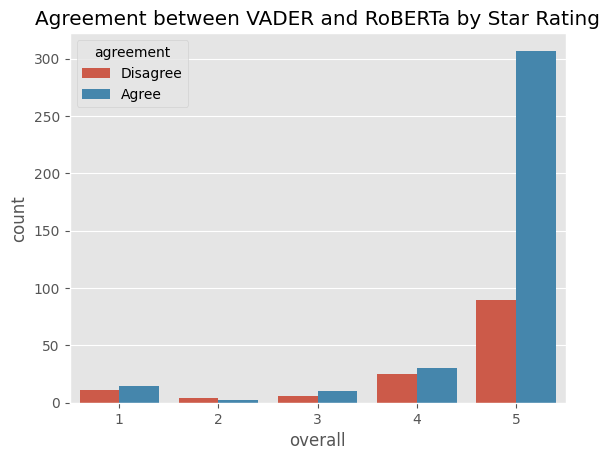

In [52]:
sns.countplot(data=final_df, x='overall', hue='agreement')
plt.title("Agreement between VADER and RoBERTa by Star Rating")
plt.show()


In [53]:
from transformers import pipeline

roberta_pipe = pipeline("sentiment-analysis", model=MODEL, tokenizer=MODEL)
print(roberta_pipe("This is absolutely amazing!"))  # example


Device set to use cpu


[{'label': 'LABEL_2', 'score': 0.988791823387146}]
